In [1]:
# imports from custom library
import sys
sys.path.append('../../')
import matplotlib.pyplot as plt
plt.rc('text', usetex=True)
from mlrefined_libraries import convnets_library as convlib
from mlrefined_libraries import basics_library as baslib
import autograd.numpy as np
import pandas as pd
import cv2
import pickle
import gzip

#this is needed to compensate for matplotlib notebook's tendancy to blow up images when plotted inline
%matplotlib notebook
from matplotlib import rcParams
rcParams['figure.autolayout'] = True

%load_ext autoreload
%autoreload 2

A more modern example of feature design, where we have only partial understanding of the underlying process generating data, lies in the task of visual object detection (first introduced in Example [Example-object-detection]). Unlike the case with Galileo and uniform acceleration described previously, here we do not know nearly as much about the underlying process of visual cognition in both an experimental and philosophical sense. However even with only pieces of a complete understanding we can still design useful features for object detection. 

One of the most crucial and commonly leveraged facts in designing features for visual classification tasks (as we will see later in Section [subsec:Histogram-features-and-image-data]) is that the distinguishing information in a natural image, that is an image a human being would normally be exposed to like a forest or outdoor scene, cityscapes, other people, animals, the insides of buildings etc., is largely contained in the relatively small number of edges in an image [#barlow1961coding, #barlow2001redundancy]. For example Figure [fig:examples images sparse in other domains] shows a natural image along with an image comprised of its most prominent edges. The majority of the pixels in this image do not belong to any edges, yet with just the edges we can still tell what the image contains.

(1270, 1694, 3)


<IPython.core.display.Javascript object>


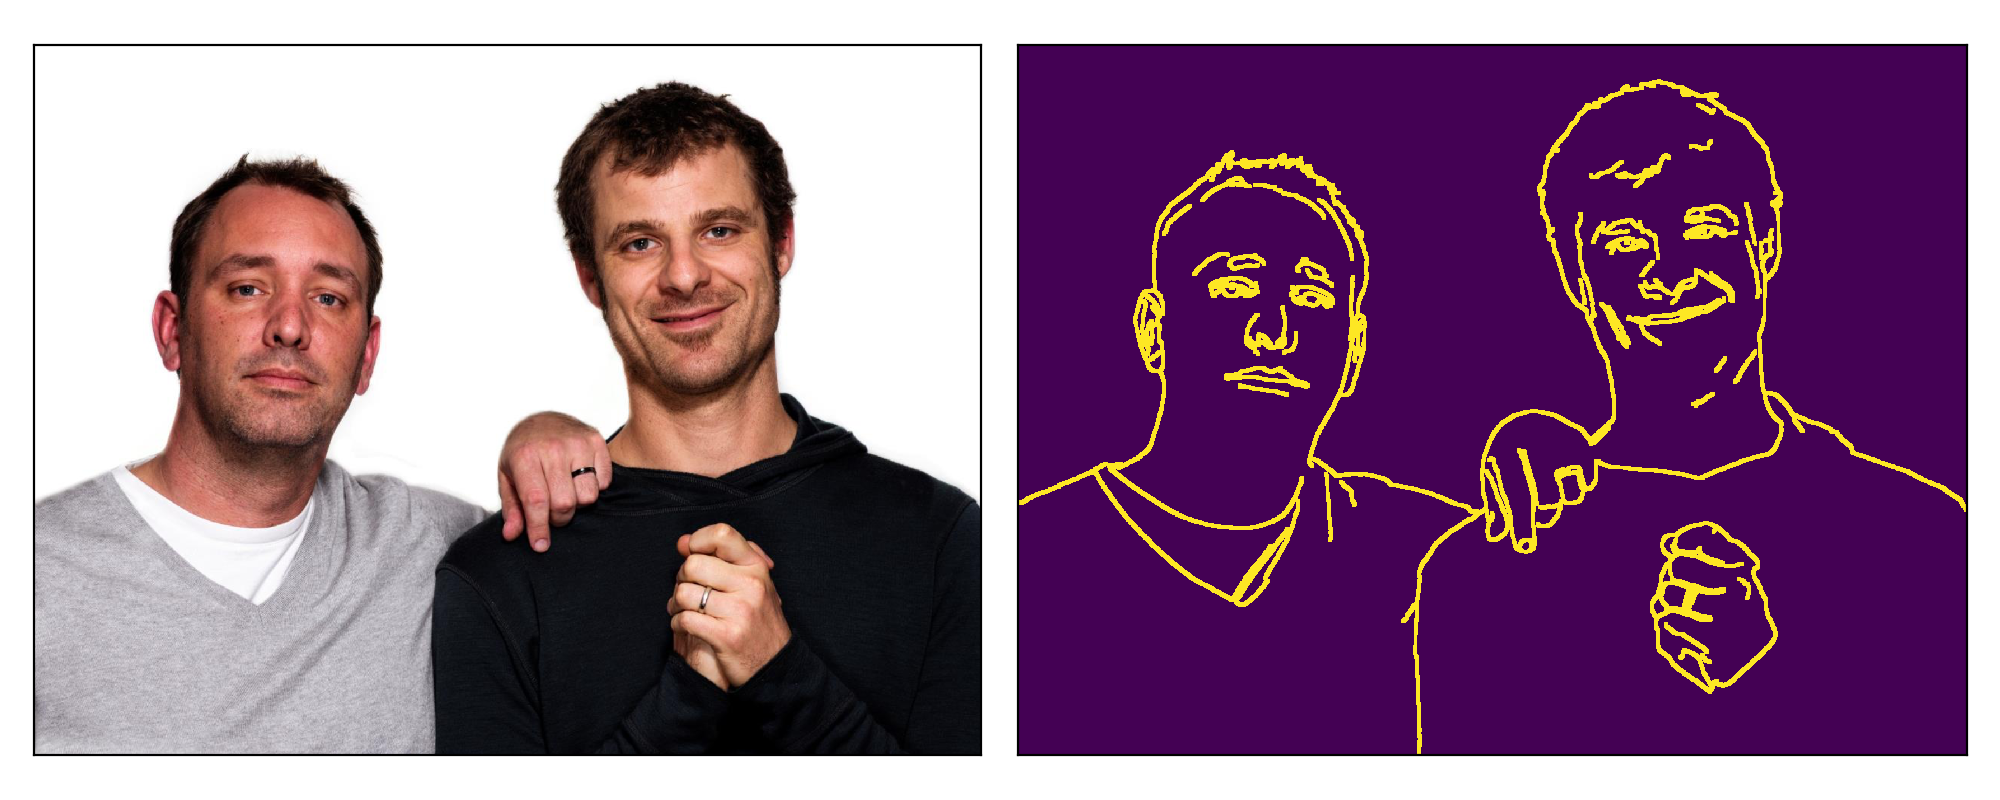

In [3]:
# provide a path to an image
image_path = '../../mlrefined_images/convnet_images/dudes.png'

# plot edge-detected version
convlib.image_viz.edge_detect(image_path=image_path, high_threshold = 125)

(left panel) A natural image (in this instance of the two creators/writers of the television show 'South Park' (this image is reproduced with permission of Jason Marck). (right panel) The edge-detected version of this image, where the bright yellow pixels indicate large edge content, still describes the scene very well (in the sense that we can still tell there are two people in the image) using only a fraction of the information contained in the original image. Note that edges have been colored yellow for visualization purposes only.

From visual studies performed largely on frogs, cats, and primates, where a subject is shown visual stimuli while electrical impulses are recorded in a small area in the subject's brain where visual information is processed, neuroscientists have determined that individual neurons involved roughly operate by identifying edges [#marvcelja1980mathematical, #jones1987evaluation]. Each neuron therefore acts as a small “edge detector”, locating edges in an image of a specific orientation and thickness, as shown in Figure [fig:Hand-drawn-diagram of V1-1]. It is thought that by combining and processing these edge detected images that humans and other mammals 'see'. 

<figure>
<img src="../../mlrefined_images/convnet_images/neuron.png" width="80%" height="auto"/>
<figcaption> <strong>Figure 1:</strong> <em> Visual information is processed in an area of the brain where each neuron detects in the observed scene edges of a specific orientation and width. It is thought that what we (and other mammals) 'see' is a processed interpolation of these edge detected images.</em>
</figcaption>
</figure>

## HOG

<IPython.core.display.Javascript object>


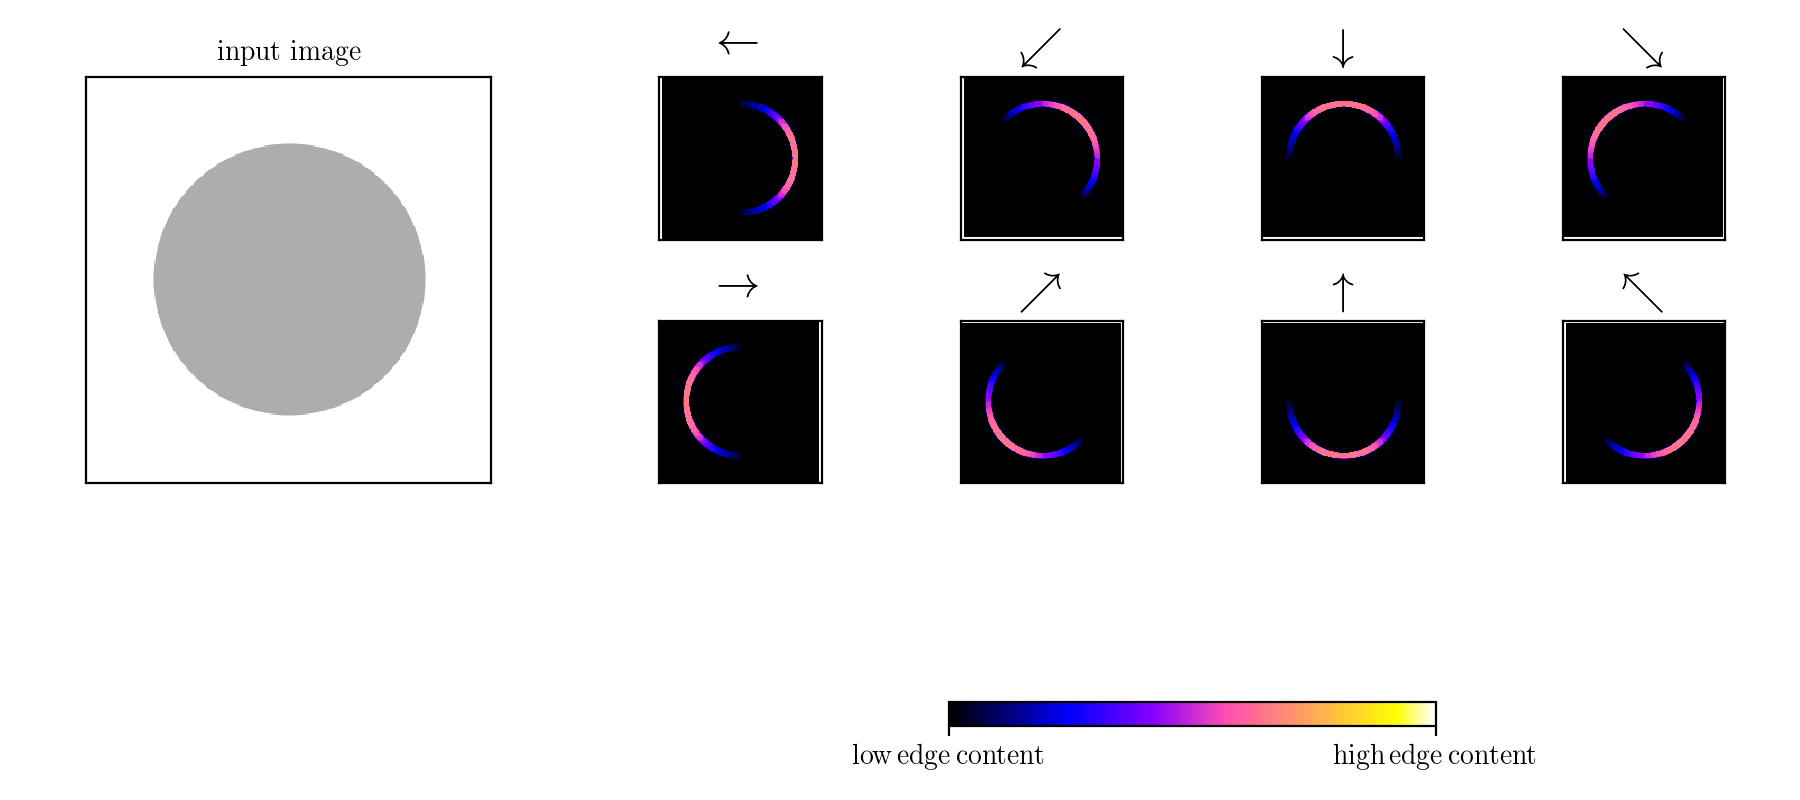

In [4]:
# load image
image = cv2.imread('../../mlrefined_images/convnet_images/circle.png',0)

# compute and plot convolution images
convlib.image_viz.show_conv_images(image)

<IPython.core.display.Javascript object>


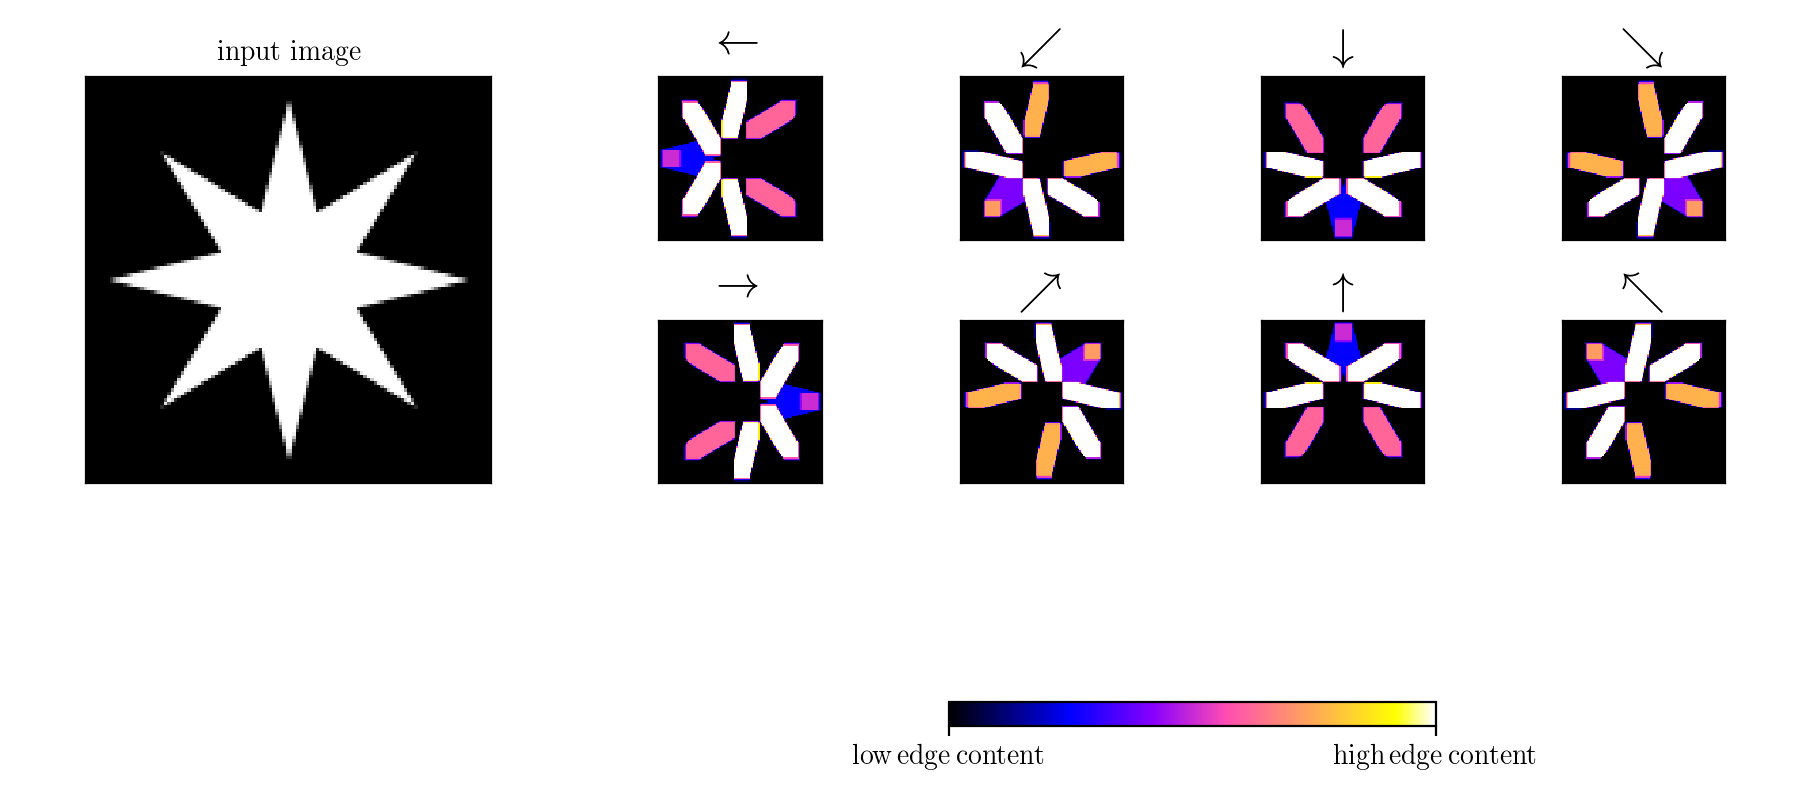

In [7]:
# load image
image = cv2.imread('../../mlrefined_images/convnet_images/star8.png',0)

# compute and plot convolution images
convlib.image_viz.show_conv_images(image)